<a href="https://colab.research.google.com/github/ZAHRAAkhazaal/Diamond-Price-prediction/blob/main/diamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
import xgboost 
from xgboost import XGBRegressor

# Load the data

In [ ]:
dataset ="train.csv"

In [ ]:
data = pd.read_csv(dataset)
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [ ]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# cleaning the data

In [ ]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

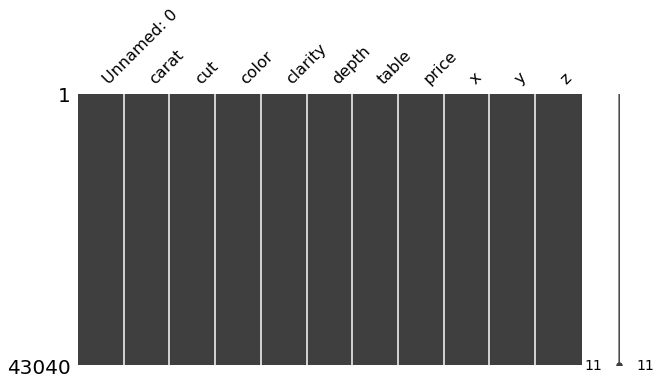

In [ ]:
mno.matrix(data, figsize = (10,5))
plt.show()

Plot Price

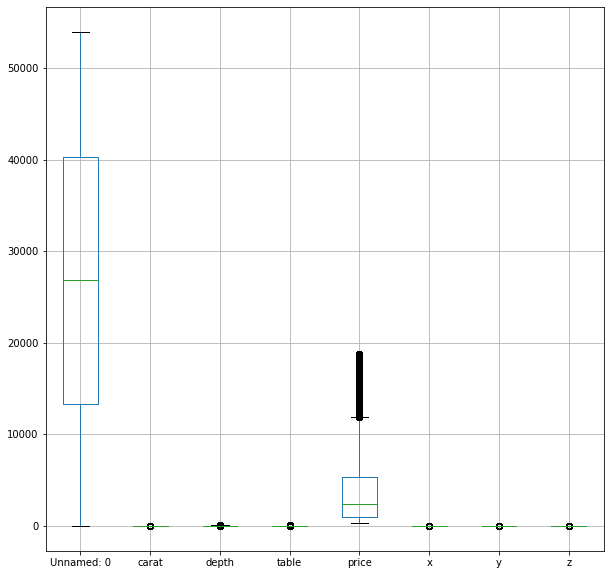

In [ ]:
data.boxplot(figsize = (10,10))

###Visulization Data

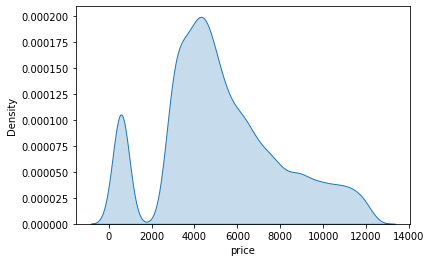

In [ ]:
sns.kdeplot(data = data["price"],shade = True)
plt.show()

In [ ]:
data_numeric = data.select_dtypes(include = [np.number])
data_numeric_col = list(data_numeric)

In [ ]:
def uva_numeric(data , column):
    size = len(column)
    plt.figure(figsize = (7*size,3), dpi = 100)
    
    for  j,i in enumerate(column):
        mini = data[i].min()
        maxi = data[i].max()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        points = mean-st_dev, mean+st_dev
        plt.subplot(1,size+7, j+7)
        sns.kdeplot(data[i], shade = True , color = "blue")
        print("minimum = {0},maximum = {1},median = {2},mean = {3},standard deviation = {4},skew = {5}".format(mini,maxi,median,mean,st_dev,skew))

minimum = 2,maximum = 53940,median = 26824.5,mean = 26758.804553903345,standard deviation = 15484.90451510466,skew = 0.008148417509466795
minimum = 0.2,maximum = 5.01,median = 0.71,mean = 0.7969635223048327,standard deviation = 0.48145473633194025,skew = 1.171970075450448
minimum = 43.0,maximum = 79.0,median = 61.8,mean = 61.74608039033457,standard deviation = 1.435246364144284,skew = -0.0819283325156834
minimum = 43.0,maximum = 95.0,median = 57.0,mean = 57.43954228624536,standard deviation = 2.2401964835541834,skew = 0.8200299786556963
minimum = 326,maximum = 18823,median = 2388.0,mean = 3942.706342936803,standard deviation = 4023.534555543323,skew = 1.633852018239581
minimum = 0.0,maximum = 10.74,median = 5.71,mean = 5.724376394052045,standard deviation = 1.1324961451670361,skew = 0.413605519444216
minimum = 0.0,maximum = 58.9,median = 5.72,mean = 5.728122444237918,standard deviation = 1.1596409694461687,skew = 2.871853364379575
minimum = 0.0,maximum = 31.8,median = 3.53,mean = 3.534

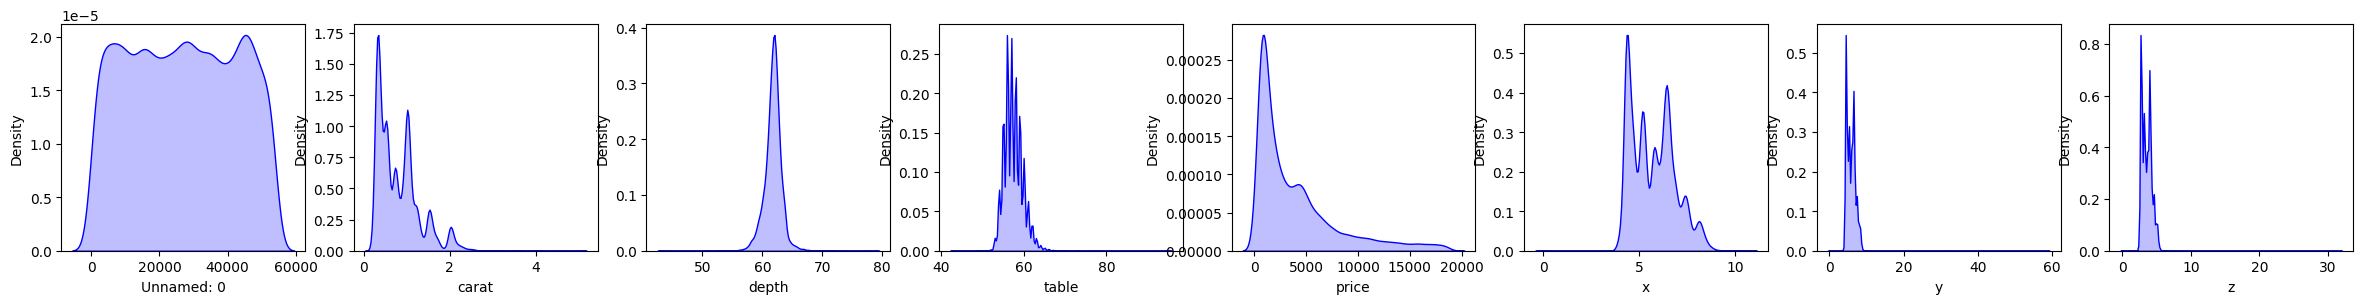

In [ ]:
uva_numeric(data, data_numeric_col)

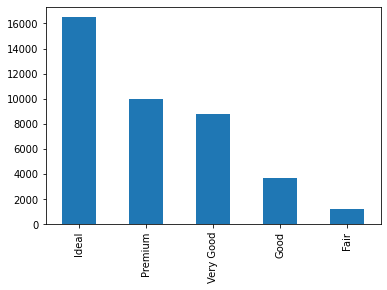

In [ ]:
data['cut'].value_counts().plot(kind='bar')

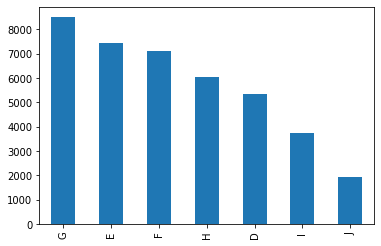

In [ ]:
data['color'].value_counts().plot(kind='bar')

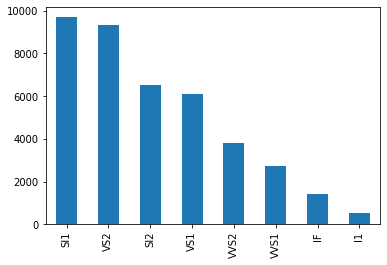

In [ ]:
data['clarity'].value_counts().plot(kind='bar')
plt.show()

###**Heat Map**

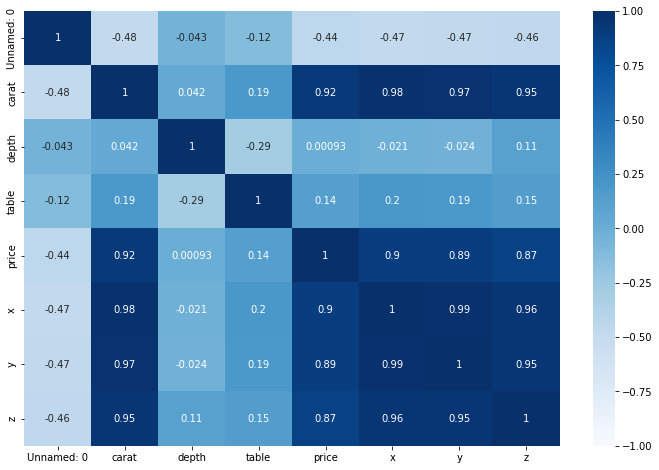

In [ ]:
plt.figure(figsize =(12,8))
sns.heatmap(data.corr() ,vmin = -1, vmax = 1, annot =True, cmap="Blues")

##**Delete unnessary columns**

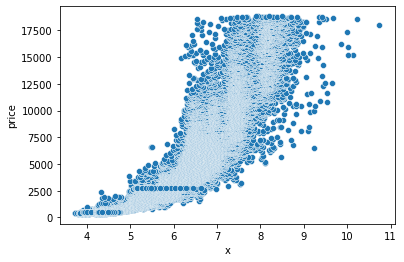

In [ ]:
sns.scatterplot(data = data, x = data["x"] , y= data["price"])

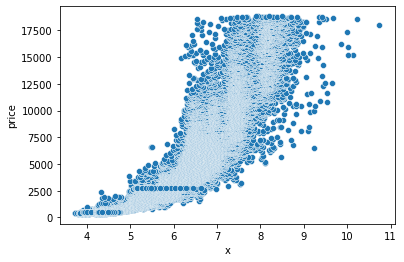

In [ ]:
sns.scatterplot(data = data, x = data["x"] , y= data["price"])

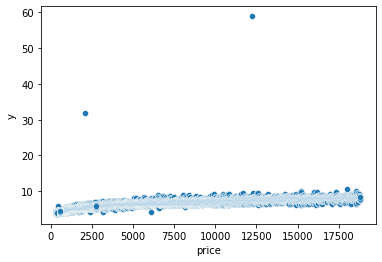

In [ ]:
sns.scatterplot(data = data, x = data["price"] , y= data["y"])

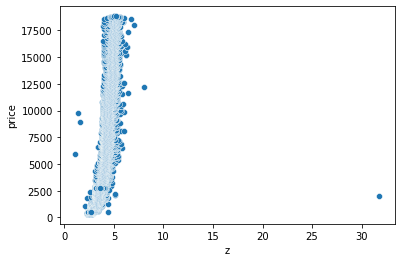

In [ ]:
sns.scatterplot(data = data, x = data["z"] , y= data["price"])

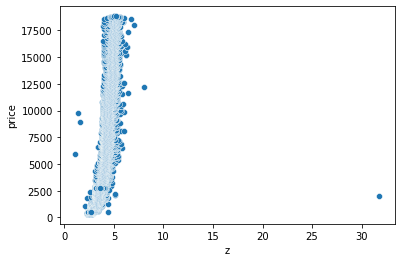

In [ ]:
sns.scatterplot(data = data, x = data["z"] , y= data["price"])

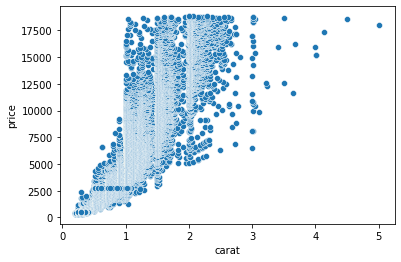

In [ ]:
sns.scatterplot(data = data, x = data["carat"] , y= data["price"])

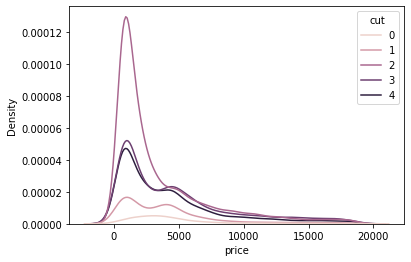

In [ ]:
sns.kdeplot(data=data, x="price", hue='cut')
plt.show()

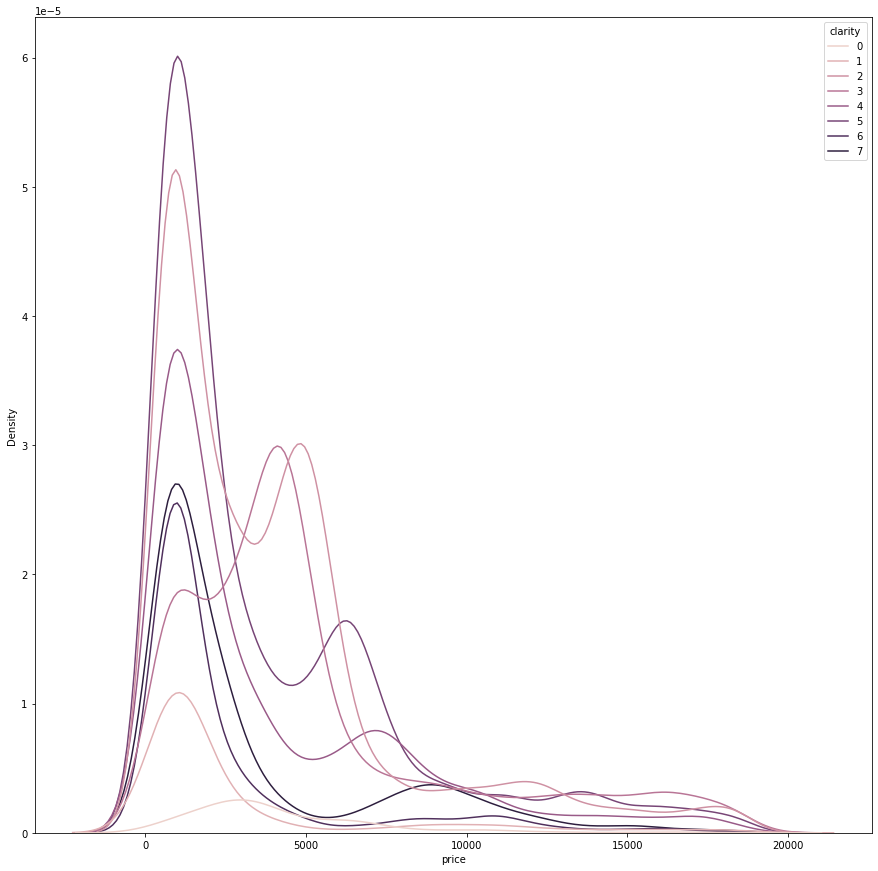

In [ ]:
plt.figure(figsize =(15,15))
sns.kdeplot(data= data, x='price', hue="clarity")

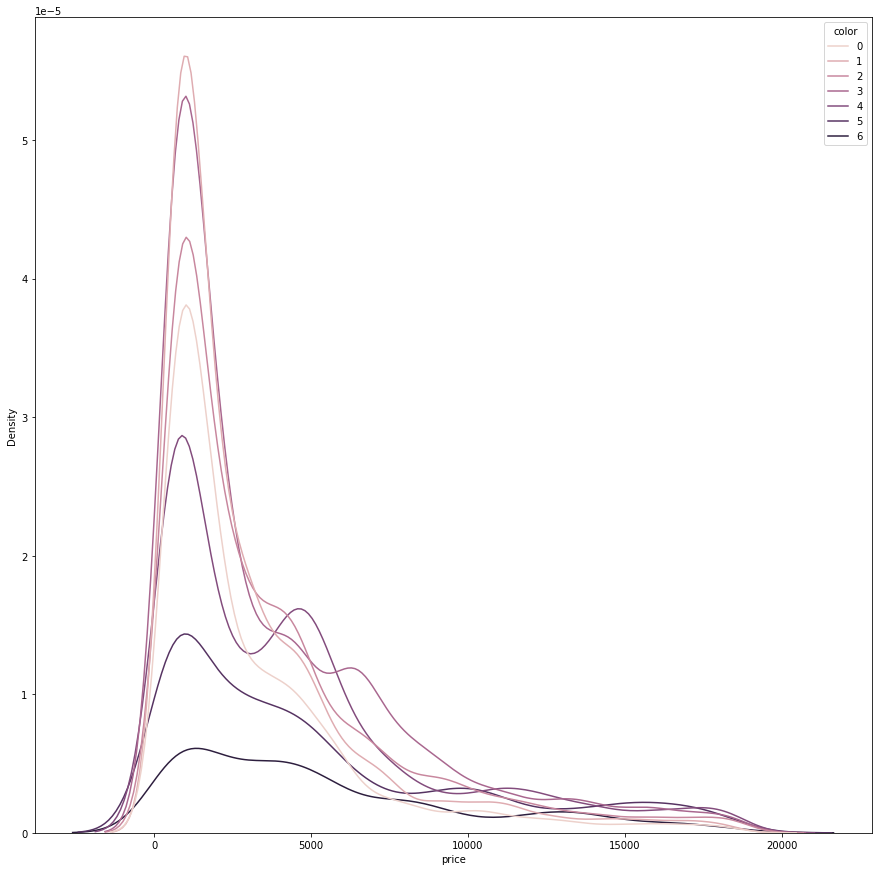

In [ ]:
plt.figure(figsize = (15,15))
sns.kdeplot(data = data, x= "price", hue= "color")

In [ ]:
expensive = data.sort_values('price',ascending = False).head(10)
expensive

,carat,cut,color,clarity,depth,table,price,x,y,z
22324,2.29,3,5,5,60.8,60.0,18823,8.50,8.47,5.16
22323,2.00,4,3,2,63.5,56.0,18818,7.90,7.97,5.04
22322,2.07,2,3,3,62.5,55.0,18804,8.20,8.13,5.11
22321,2.00,4,4,2,62.8,57.0,18803,7.95,8.00,5.01
22320,2.29,3,5,2,61.8,59.0,18797,8.52,8.45,5.24
22319,2.00,3,5,4,60.8,59.0,18795,8.13,8.02,4.91
22318,2.04,3,4,2,58.1,60.0,18795,8.37,8.28,4.84
22317,2.15,2,3,3,62.6,54.0,18791,8.29,8.35,5.21
22316,1.71,3,2,5,62.3,59.0,18791,7.57,7.53,4.70
22314,2.05,2,3,2,61.9,57.0,18787,8.10,8.16,5.03


In [ ]:
cheap = data.sort_values('price',ascending = True).head(10)
cheap

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
1,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
2,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
3,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
4,0.24,4,5,6,62.3,57.0,336,3.95,3.98,2.47
5,0.22,0,1,5,65.1,61.0,337,3.87,3.78,2.49
6,0.30,1,6,2,64.0,55.0,339,4.25,4.28,2.73
7,0.22,3,2,2,60.4,61.0,342,3.88,3.84,2.33
8,0.31,2,6,3,62.2,54.0,344,4.35,4.37,2.71
9,0.20,3,1,3,60.2,62.0,345,3.79,3.75,2.27


### feature selection

###### drop zeroes in X,y and z

In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data=data.drop(data[data['x']==0].index)

In [ ]:
data=data.drop(data[data['y']==0].index)

In [ ]:
data=data.drop(data[data['z']==0].index)

###### convert categoric data into numeric usinf label encoder

In [ ]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)

In [ ]:
le = LabelEncoder()
for col in object_cols:
    data[col] = le.fit_transform(data[col])

**[Hash **encoder**

### featerues X

In [ ]:
data.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [ ]:
X = pd.concat([data["carat"],data['cut'],data['color'],data['clarity'],data['depth'],data['table'],data["x"],data['y'],data['z']], axis = 1)
X.head(2)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
1,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63


### Target Y

In [ ]:
y = data.price
y.head(2)

0    326
1    334
Name: price, dtype: int64

## Cross validation and standarization

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.1,random_state=42)

In [ ]:
scaler=StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[-0.51269144, -0.51043605, -0.35403127, ..., -0.40553296,
        -0.35726863, -0.41134144],
       [-0.16205342, -0.51043605,  1.41461798, ...,  0.03599092,
         0.06074185,  0.01785405],
       [-0.92520675,  1.44279323,  0.82506823, ..., -1.0236664 ,
        -1.00651893, -1.12666727],
       ...,
       [-0.55394297,  1.44279323,  2.00416773, ..., -0.48500726,
        -0.4639947 , -0.49718054],
       [-0.61582026, -1.48705069,  0.23551848, ..., -0.59980347,
        -0.57961462, -0.42564796],
       [-1.02833557, -1.48705069,  0.82506823, ..., -1.27975025,
        -1.32669717, -1.18389334]])

XGBRegressor

In [ ]:
model = XGBRegressor(n_estimators=1000, max_depth=20, eta=0.1, subsample=0.7, colsample_bytree=0.8)
modelxg=model.fit(X_train,y_train)
model_xgb=model.predict(X_test)

[18:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:

model_xgb

array([1637.4275 , 3012.7808 ,  633.42786, ...,  974.5433 , 1921.0161 ,
        777.2006 ], dtype=float32)

In [ ]:
xgb_mse = mean_squared_error(y_test, model_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

547.8000163567018

In [ ]:
r2_xgb = r2_score(y_test,model_xgb)*100
r2_xgb

98.18273855760481

##Gradient boost regressor

In [ ]:
gb=GradientBoostingRegressor(learning_rate = 0.07, max_depth=20)

In [ ]:
model_gb_cross = gb.fit(X_train,y_train) #trained
predict_gb_cross = gb.predict(X_test) #predict


In [ ]:
predict_gb_cross

array([1634.46974406, 2801.21573985,  629.82238988, ...,  974.48348646,
       2075.19574408,  778.23044956])

In [ ]:
gb_mse_cross = mean_squared_error(y_test, predict_gb_cross)
gb_rmse_cross = np.sqrt(gb_mse_cross)
gb_rmse_cross

679.9092733897363

In [ ]:
r2_lasso = r2_score(y_test,predict_gb_cross)*100
r2_lasso

97.20053359858375

###Random Forest

In [ ]:
forest = RandomForestRegressor()
model_forest_cross = forest.fit(X_train,y_train)
predict_forest_cross = forest.predict(X_test)

In [ ]:
forest_mse_cross = mean_squared_error(y_test, predict_forest_cross)
forest_rmse_cross = np.sqrt(forest_mse_cross)
forest_rmse_cross

537.5055143419686

In [ ]:
r2_forest = r2_score(y_test,predict_forest_cross )*100
r2_forest

98.25039835444603

##Test Data




In [ ]:
datatest = "/content/test.csv"
test_data = pd.read_csv(datatest)
test_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
2,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
3,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39
4,12,0.23,Ideal,J,VS1,62.8,56.0,3.93,3.90,2.46


In [ ]:
test_data_num = test_data.select_dtypes(include = [np.number])
test_data_num

,Unnamed: 0,carat,depth,table,x,y,z
0,1,0.23,61.5,55.0,3.95,3.98,2.43
1,3,0.23,56.9,65.0,4.05,4.07,2.31
2,8,0.26,61.9,55.0,4.07,4.11,2.53
3,10,0.23,59.4,61.0,4.00,4.05,2.39
4,12,0.23,62.8,56.0,3.93,3.90,2.46
...,...,...,...,...,...,...,...
10895,53922,0.70,62.8,60.0,5.59,5.65,3.53
10896,53923,0.70,63.1,59.0,5.67,5.58,3.55
10897,53933,0.70,60.5,59.0,5.71,5.76,3.47
10898,53934,0.70,61.2,59.0,5.69,5.72,3.49


In [ ]:
s = (test_data.dtypes =="object")
object_cols = list(s[s].index)

In [ ]:
t = (test_data.dtypes =="object")
object_cols_t = list(t[t].index)

#convert categorical data into numerical using label encoder
le = LabelEncoder()
for col in object_cols:
    test_data[col] = le.fit_transform(test_data[col])


In [ ]:
test_data =pd.concat([test_data["carat"], test_data['cut'], test_data["color"], test_data["clarity"], test_data["depth"],test_data['table'],test_data["x"],test_data['y'],test_data['z']], axis = 1)
test_data.head(1) 


,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43


In [ ]:
scaler=StandardScaler()
scaler.fit_transform(test_data)

array([[-1.28962548e+00, -5.61498820e-01, -9.57792092e-01, ...,
        -1.67725491e+00, -1.66362033e+00, -1.68217104e+00],
       [-1.28962548e+00, -1.51333974e+00, -9.57792092e-01, ...,
        -1.58448291e+00, -1.57949577e+00, -1.86144721e+00],
       [-1.22196347e+00,  1.34218303e+00,  8.15595678e-01, ...,
        -1.56592851e+00, -1.54210707e+00, -1.53277423e+00],
       ...,
       [-2.29587337e-01,  1.34218303e+00, -9.57792092e-01, ...,
        -4.44675808e-02,  1.76653015e-04, -1.28444247e-01],
       [-2.29587337e-01,  1.34218303e+00, -9.57792092e-01, ...,
        -6.30219823e-02, -3.72120433e-02, -9.85648860e-02],
       [-2.29587337e-01,  1.34218303e+00, -1.54892135e+00, ...,
        -9.08535846e-02, -7.46007397e-02,  6.01287882e-03]])

##Predication using Gradinet booster Regressor

In [ ]:
predict_gb_test_1 = gb.predict(test_data)

In [ ]:
predict_gb_test_1

array([ 394.70081221,  383.73362487,  359.53148086, ..., 2720.97406043,
       2704.23391894, 2717.10952266])

##Predict using XGBRegressot

In [ ]:
model_xgb11=model.predict(test_data)

In [ ]:
model_xgb11

array([ 452.70303,  356.33557,  351.0564 , ..., 2848.7786 , 2950.5564 ,
       2644.5496 ], dtype=float32)

Prediction using Random Forest Regressor

In [ ]:
predict_fr_test_11 = forest.predict(test_data)

In [ ]:
predict_fr_test_11 

array([ 408.74,  434.5 ,  398.84, ..., 2804.21, 2894.16, 2697.94])

In [ ]:
sample = "/content/sample_submission.csv"
submission = pd.read_csv(sample)
submission.shape

(10900, 2)

In [ ]:
# submission.drop('price', inplace = True, axis = 1)
submission["price"] = predict_fr_test_11 

In [ ]:
submission["price"].shape

(10900,)

In [ ]:
submission[1:100]

,Unnamed: 0,price
1,3,434.50
2,8,398.84
3,10,406.38
4,12,441.77
5,22,377.69
...,...,...
95,378,3067.20
96,379,2860.53
97,381,2841.92
98,387,2685.03


In [ ]:
submission.to_csv('submission.csv(gb)',index=False)

##Cmparsion between all regressor

(-5000.0, 40000.0)

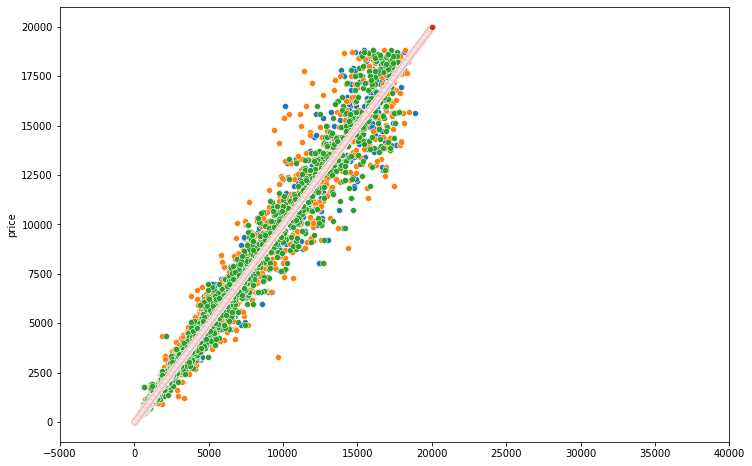

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=model_xgb,y=y_test) #   --> XGB # blue
sns.scatterplot(x=predict_gb_cross, y=y_test)  #GB --> elasticnet model #red
sns.scatterplot(x=predict_forest_cross,y=y_test) #Random Forest #green

a=np.arange(1,20000)
sns.scatterplot(x=a,y=a)
plt.xlim([-5000,40000])
